# 1D testing the action potential of cell models by using standard parameters


In [1]:
# fileName

fileName = 'eg_1D_testing-cell-models'

In [2]:
# libs

import pyNN.nest as sim
from pyNN import space 
import numpy as np
import matplotlib.pyplot as plt


/home/alberto-int/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'pynestkernel' does not match runtime version 3.7
  return f(*args, **kwds)


CSAConnector: libneurosim support not available in NEST.
Falling back on PyNN's default CSAConnector.
Please re-compile NEST using --with-libneurosim=PATH


/home/alberto-int/anaconda3/lib/python3.7/site-packages/PyNN-0.9.5-py3.7.egg/pyNN/nest/__init__.py:53: UserWarning:Unable to install NEST extensions. Certain models may not be available.


In [3]:
# simulation settings

sim.setup(
        timestep=1, # [ms]
        min_delay=1, # [ms]
        max_delay=100) # [ms]

simtime = 250 # [ms+]



/usr/lib/python3.5/dist-packages/nest/lib/hl_api_helper.py:127: UserWarning:
ResetNetwork is deprecated and will be removed in NEST 3.0.


## make the network

In [4]:
# define make_pop with stanrdard parameters

pops = {}

def make_pop(cell_model):
    pops = sim.Population(
                            1, # one cell in each cell model
                            cell_model,
                            label=str(cell_model),
                            )
    pops.record('v')
    
    return pops




In [5]:
sim.list_standard_models()

NEST does not allow setting an initial value for isyn_exc
NEST does not allow setting an initial value for isyn_inh
NEST does not allow setting an initial value for isyn_exc
NEST does not allow setting an initial value for isyn_inh
NEST does not allow setting an initial value for g_ex
NEST does not allow setting an initial value for g_in
NEST does not allow setting an initial value for g_ex
NEST does not allow setting an initial value for g_in
NEST does not allow setting an initial value for g_r
NEST does not allow setting an initial value for g_s
NEST does not allow setting an initial value for g_ex
NEST does not allow setting an initial value for g_in
NEST does not allow setting an initial value for g_ex
NEST does not allow setting an initial value for g_in
NEST does not allow setting an initial value for E_sfa
NEST does not allow setting an initial value for I_stc
NEST does not allow setting an initial value for g_ex
NEST does not allow setting an initial value for g_in


['IF_curr_alpha',
 'IF_curr_exp',
 'IF_cond_alpha',
 'IF_cond_exp',
 'IF_cond_exp_gsfa_grr',
 'IF_facets_hardware1',
 'HH_cond_exp',
 'EIF_cond_alpha_isfa_ista',
 'SpikeSourcePoisson',
 'SpikeSourcePoissonRefractory',
 'SpikeSourceGamma',
 'SpikeSourceArray',
 'EIF_cond_exp_isfa_ista',
 'Izhikevich',
 'GIF_cond_exp']

In [6]:
# compute pops

for idx, value in enumerate([sim.IF_curr_alpha(),
                                 sim.IF_curr_exp(),
                                 sim.IF_cond_alpha(),
                                 sim.IF_cond_exp(),
                                 sim.IF_cond_exp_gsfa_grr(),
                                 sim.IF_facets_hardware1(),
                                 sim.EIF_cond_alpha_isfa_ista(),
                                 sim.EIF_cond_exp_isfa_ista(),
                                 sim.Izhikevich(),
                                 sim.GIF_cond_exp()]):
    print(idx,value)
    pops['model_' + str(idx)] = make_pop(value) 

NEST does not allow setting an initial value for isyn_exc
NEST does not allow setting an initial value for isyn_inh
NEST does not allow setting an initial value for isyn_exc
NEST does not allow setting an initial value for isyn_inh
NEST does not allow setting an initial value for g_ex
NEST does not allow setting an initial value for g_in
NEST does not allow setting an initial value for g_ex
NEST does not allow setting an initial value for g_in
NEST does not allow setting an initial value for g_r
NEST does not allow setting an initial value for g_s
NEST does not allow setting an initial value for g_ex
NEST does not allow setting an initial value for g_in
NEST does not allow setting an initial value for E_sfa
NEST does not allow setting an initial value for I_stc
NEST does not allow setting an initial value for g_ex
NEST does not allow setting an initial value for g_in


0 IF_curr_alpha(<parameters>)
1 IF_curr_exp(<parameters>)
2 IF_cond_alpha(<parameters>)
3 IF_cond_exp(<parameters>)
4 IF_cond_exp_gsfa_grr(<parameters>)
5 IF_facets_hardware1(<parameters>)
6 EIF_cond_alpha_isfa_ista(<parameters>)
7 EIF_cond_exp_isfa_ista(<parameters>)
8 Izhikevich(<parameters>)
9 GIF_cond_exp(<parameters>)


In [7]:
# check pops

pops.keys()

dict_keys(['model_0', 'model_1', 'model_2', 'model_3', 'model_4', 'model_5', 'model_6', 'model_7', 'model_8', 'model_9'])

## make the thalamic input stimulus

In [8]:
pops['thalamus'] = sim.Population(
                            1, # one thalamic cell for each cell model
                            sim.SpikeSourceArray(spike_times=np.arange(50,60)), # ten sequentially spike times
                            structure = space.Line(dx=1.0, x0=0.0, y=0.0, z=0.0),
                            )    

pops.keys()

dict_keys(['model_0', 'model_1', 'model_2', 'model_3', 'model_4', 'model_5', 'model_6', 'model_7', 'model_8', 'model_9', 'thalamus'])

## make the projections

In [9]:
projs = {}

for i in range(len(pops.keys())-1):
    projs['thalamus', 'model_' + str(i)] = sim.Projection(
                                    pops['thalamus'],
                                    pops['model_' + str(i)],
                                    sim.OneToOneConnector(),
                                    synapse_type=sim.StaticSynapse(weight=0.1, delay=1.0),
                                    receptor_type = 'excitatory',
                                    space = space.Space(axes = 'x'),
                                    label=None,
                                )

len(projs.keys())

10

## run the simulation

In [10]:
sim.run(simtime) 

250.0

## save results

In [11]:
# save the results

outputs = {}

for i in range(len(pops.keys())-1):
    outputs['model_' + str(i)] = pops['model_' + str(i)].get_data()
    for recording in ['v', 'gsyn_inh', 'gsyn_exc', 'spikes']:
        pops['model_' + str(i)].write_data(fileName + '_' + str(recording) + '.pkl')


## recover results

In [12]:
# make the recover results function

def recover_results(outputs):
    results = {}
    for key in outputs.keys(): 
        
        # to get voltage and conductances
        for analogsignal in outputs[key].segments[0].analogsignals:
            print(analogsignal.name)
            results[key, analogsignal.name] = analogsignal

        # to get spikes
        results[key, 'spikes'] = outputs[key].segments[0].spiketrains
    return results


In [13]:
# recover results

results = recover_results(outputs)
results.keys()

v
v
v
v
v
v
v
v
v
v


dict_keys([('model_0', 'v'), ('model_0', 'spikes'), ('model_1', 'v'), ('model_1', 'spikes'), ('model_2', 'v'), ('model_2', 'spikes'), ('model_3', 'v'), ('model_3', 'spikes'), ('model_4', 'v'), ('model_4', 'spikes'), ('model_5', 'v'), ('model_5', 'spikes'), ('model_6', 'v'), ('model_6', 'spikes'), ('model_7', 'v'), ('model_7', 'spikes'), ('model_8', 'v'), ('model_8', 'spikes'), ('model_9', 'v'), ('model_9', 'spikes')])

## check the voltage signature

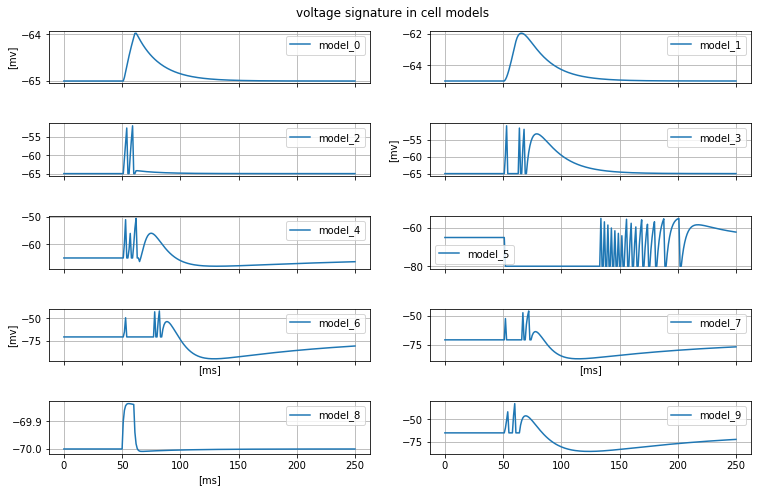

In [16]:
%matplotlib inline

fig, axes = plt.subplots(5, 2, sharex=True, sharey=False, figsize=(11,7))
fig.tight_layout(pad=3)
fig.suptitle('voltage signature in cell models')

axes_list = fig.axes
idx = 0
for i in range(len(pops.keys())-1):
    im = axes_list[i].plot(results['model_' + str(i), 'v'], label=str('model_' + str(i)))
    #axes_list[i].set_xticklabels([])
    axes_list[i].legend()
    axes_list[i].grid(which='both')
    if i==0 or i==3 or i==6:
        axes_list[i].set_ylabel('[mv]')
    if i==6 or i==7 or i==8:
        axes_list[i].set_xlabel('[ms]')
#fig.show()

In [17]:
# end simulation

sim.end()

## Task 1: on the action potential of cell models

- Have a look of the plot, you should observe the different voltage signatures having similarities as well as differences. <br>
  Describe them or try making a classification by adopting criteria indicated in this bottom image<br>
  
  e.g., 
      - depolarization timing
      - shape of depolarization
      - action potential timing
      - shape of repolarization
      - presence/absence of refractory period
      - resting state timing
      
      
- This simulation has been done with standard parameters. <br>
  Choose a parameter shared from all the models and tune it. <br>
  Observe how the voltage trace of the action potential changes. <br>
  To explore the default paramters, use e.g., `sim.IF_cond_exp.default_parameters` <br>
  Change them by defining a new dictionary of pars for each model call e.g., pars[model_x]<br>
  

![](https://upload.wikimedia.org/wikipedia/commons/4/4a/Action_potential.svg)

## Task 2: on the network of different cell models

- The previous results are related to single behaviour of the given cell models.<br>
  Try to make a population of 25 cells for each model and record their voltage.<br>
  The input should be design as a sequence of ten input spikes separeted 150 ms for each model.<br>
  E.g., the first model receives input at 50-59ms, the second at 200-209ms, the third at 350-359ms etc.<br>
  Plot the results in a single plot showing the all traces that should appear sequentally displayed.<br>
  Set the simtime at 1500ms.